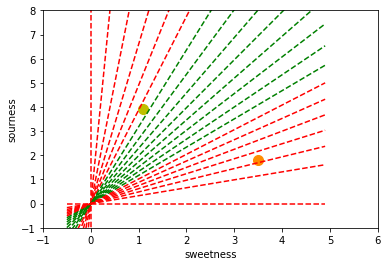

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def create_distance_function(a, b, c):
  """ 0 = ax + by + c """
  def distance(x, t):
    """ returns tuple (d, pos)
        d is the distance
        if pos == -1 points is below the line
        0 on the line ans +1 if above the line
    """
    nom = a * x + b * y + c
    if nom == 0:
      pos = 0
    elif ((nom < 0 and b < 0) or (nom > 0 and b > 0)):
      pos = -1
    else:
      pos = 1
    return (np.absolute(nom) / np.sqrt(a ** 2 + b ** 2), pos)
  return distance

points = [(3.5, 1.8), (1.1, 3.9)]

fig, ax = plt.subplots();
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 8])
X = np.arange(-0.5, 5, 0.1)

colors = ["r", ""] # for the samples

size = 10
co = 0
for (index, (x, y)) in enumerate(points):
  if(index == 0):
    ax.plot(x, y, "o",
            color = "darkorange", markersize = size)
  else:
    ax.plot(x, y, "oy", markersize = size)

step = 0.05
for x in np.arange(0, 1 + step, step):
  slope = np.tan(np.arccos(x))
  dist4line1 = create_distance_function(slope, -1, 0)
  # print("x: ", x, "slope: ", slope)
  Y = slope * X
  results = []
  for point in points:
    results.append(dist4line1(*point))
  #print(slope, result)
  if (results[0][1] != results[1][1]):
    ax.plot(X, Y, "g--")
  else:
    ax.plot(X, Y, "r--")
plt.show()

In [25]:
import numpy as np


class Perceptron:
  def __init__(self,input_length,weights=None):
    if weights is None:
      self.weights=np.ones(input_length) * 0.5 
    else:
      self.weights=weights
      
  def unit_step_function(x): 
    # here i'm setting threshold value as 1
    if x>=1: # if the weight sum is greater than or equal to 1 then i'm returing true otherwise false
      return 1
    return 0
  def __call__(self,in_data):
    weighted_input=self.weights * in_data
    weighted_sum=weighted_input.sum()  
    return Perceptron.unit_step_function(weighted_sum)

p = Perceptron(3, np.array([0.5,0.5,0]))
bias = -1 # here I am adding bias as -1
data_in = np.empty((3, ))
for in1 in range(2):
  for in2 in range(2):
    data_in = (in1,in2, bias)
    data_out = p(data_in)
    print(data_in,data_out)

(0, 0, -1) 0
(0, 1, -1) 0
(1, 0, -1) 0
(1, 1, -1) 1
